In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population/Electric_Vehicle_Population_Data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
vehicle = pd.read_csv('/kaggle/input/electric-vehicle-population/Electric_Vehicle_Population_Data.csv')

In [5]:
vehicle.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
5,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,2.0,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10
6,1N4AZ0CP2D,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,14.0,150126840,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
8,1N4AZ0CP8F,Kitsap,Port Orchard,WA,98366.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,26.0,137322111,POINT (-122.639265 47.5373),PUGET SOUND ENERGY INC,5.303509e+10
9,5UXTA6C03N,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,47.0,240226332,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [6]:
vehicle.tail(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
177856,5YJYGAEE2M,Snohomish,Bothell,WA,98021.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,172837199,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
177857,1N4AZ0CP0F,Mason,Shelton,WA,98584.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,35.0,165408603,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177858,5YJ3E1EB8N,Snohomish,Snohomish,WA,98296.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,213520422,POINT (-122.15134 47.8851158),PUGET SOUND ENERGY INC,5.306105e+10
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177860,1G1FX6S00J,Clallam,Sequim,WA,98382.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,24.0,347972607,POINT (-123.105015 48.08125),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177865,5YJ3E1EA8M,Pierce,Tacoma,WA,98422.0,2021,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,27.0,211464683,POINT (-122.38578 47.28971),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305394e+10


In [7]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

Data Cleaning

In [8]:
missing_values = vehicle.isnull().sum()

In [9]:
missing_values

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [12]:
vehicle_clean = vehicle.dropna()

In [13]:
vehicle_clean

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


Summary Statistics

In [16]:
vehicle_clean.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177473.000000,177473.000000,177473.000000,177473.000000,177473.000000,1.774730e+05,1.774730e+05
mean,98260.199332,2020.517115,58.826548,1070.609839,29.127710,2.202527e+08,5.303981e+10
std,303.694979,2.989179,91.973457,8346.920672,14.892259,7.585304e+07,1.620333e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.815241e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282691e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548504e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


In [20]:
# Postal code 

# min 

min_electric_vehicle = vehicle_clean['Postal Code'].min()
print("Electric Vehicle Value By Min Postalcode:", min_electric_vehicle)

# mean 

mean_electric_vehicle = vehicle_clean['Postal Code'].mean()
print("Electric Vehicle Value By Mean Postalcode:", mean_electric_vehicle)

# median 

median_electric_vehicle = vehicle_clean['Postal Code'].median()
print("Electric Vehicle Value By Median Postalcode:", median_electric_vehicle)


# max

max_electric_vehicle = vehicle_clean['Postal Code'].max()
print("Electric Vehicle Value By Max Postalcode:", max_electric_vehicle)

#std

std_electric_vehicle = vehicle_clean['Postal Code'].std()
print("Electric Vehicle Value By Standard Postalcode:", std_electric_vehicle)

# count

count_electric_vehicle = vehicle_clean['Postal Code'].count()
print("Electric Vehicle Value By Count Postalcode:", count_electric_vehicle)

Electric Vehicle Value By Min Postalcode: 98001.0
Electric Vehicle Value By Mean Postalcode: 98260.19933172934
Electric Vehicle Value By Median Postalcode: 98122.0
Electric Vehicle Value By Max Postalcode: 99403.0
Electric Vehicle Value By Standard Postalcode: 303.69497907863973
Electric Vehicle Value By Count Postalcode: 177473


In [22]:
# quantile

q1_electric_vehicle = vehicle_clean['Postal Code'].quantile(0.25)
q2_electric_vehicle = vehicle_clean['Postal Code'].quantile(0.50)
q3_electric_vehicle = vehicle_clean['Postal Code'].quantile(0.75)

In [23]:
print("Q1 (25th Percentile):", q1_electric_vehicle)
print("Q2 (Median/50th Percentile):", q2_electric_vehicle)
print("Q3 (75th Percentile):", q3_electric_vehicle)

Q1 (25th Percentile): 98052.0
Q2 (Median/50th Percentile): 98122.0
Q3 (75th Percentile): 98370.0


Data Visualization For First 10 Rows

In [24]:
vehicle_clean.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

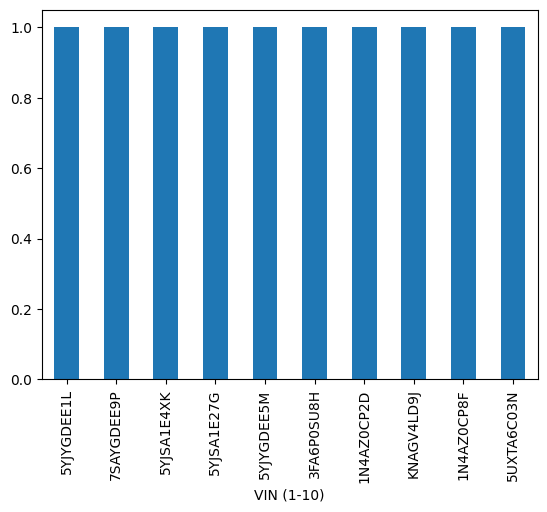

In [25]:
vehicle_clean['VIN (1-10)'].head(10).value_counts().plot(kind='bar')
plt.show()

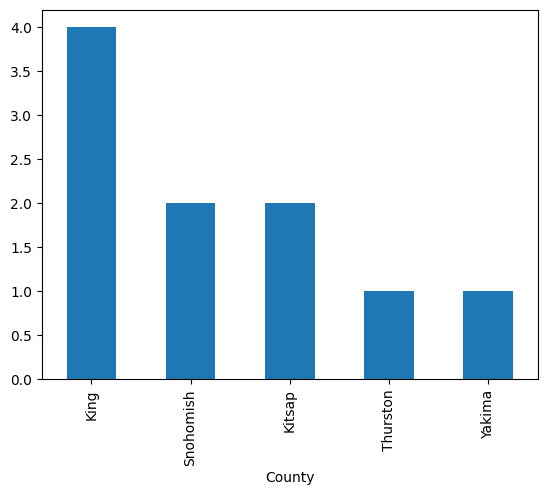

In [26]:
vehicle_clean['County'].head(10).value_counts().plot(kind='bar')
plt.show()

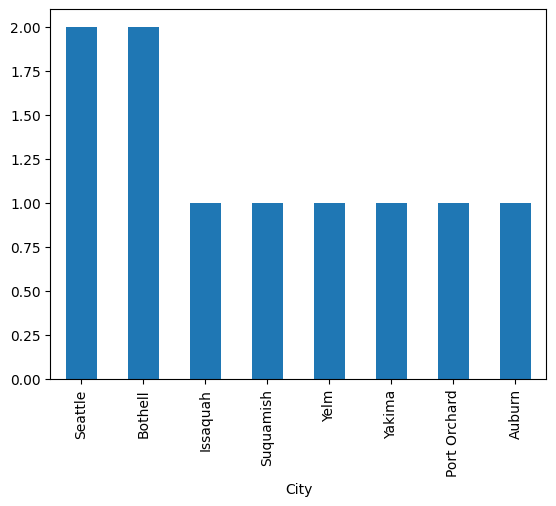

In [27]:
vehicle_clean['City'].head(10).value_counts().plot(kind='bar')
plt.show()

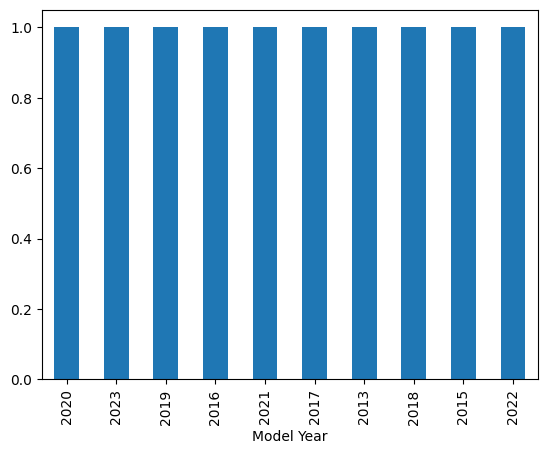

In [28]:
vehicle_clean['Model Year'].head(10).value_counts().plot(kind='bar')
plt.show()

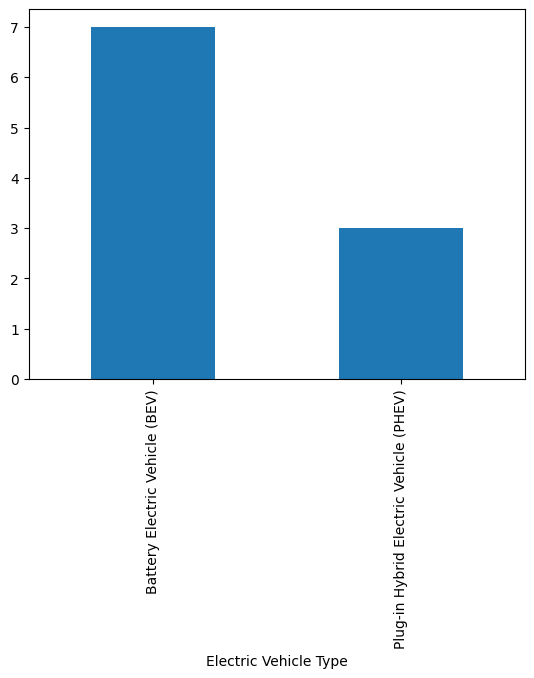

In [29]:
vehicle_clean['Electric Vehicle Type'].head(10).value_counts().plot(kind='bar')
plt.show()

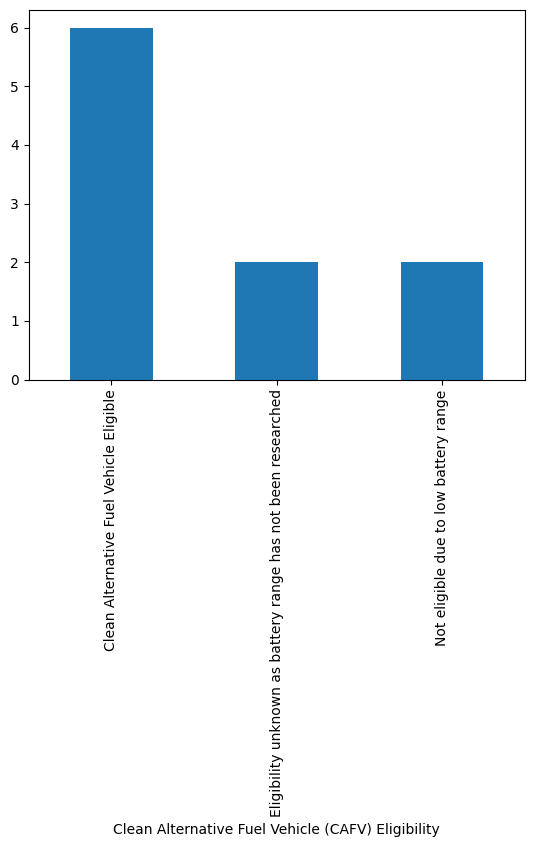

In [30]:
vehicle_clean['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].head(10).value_counts().plot(kind='bar')
plt.show()

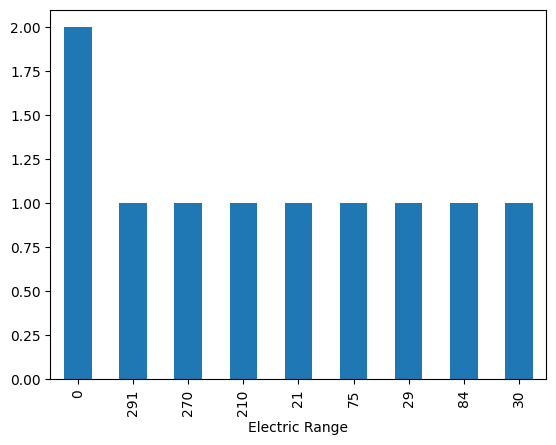

In [31]:
vehicle_clean['Electric Range'].head(10).value_counts().plot(kind='bar')
plt.show()

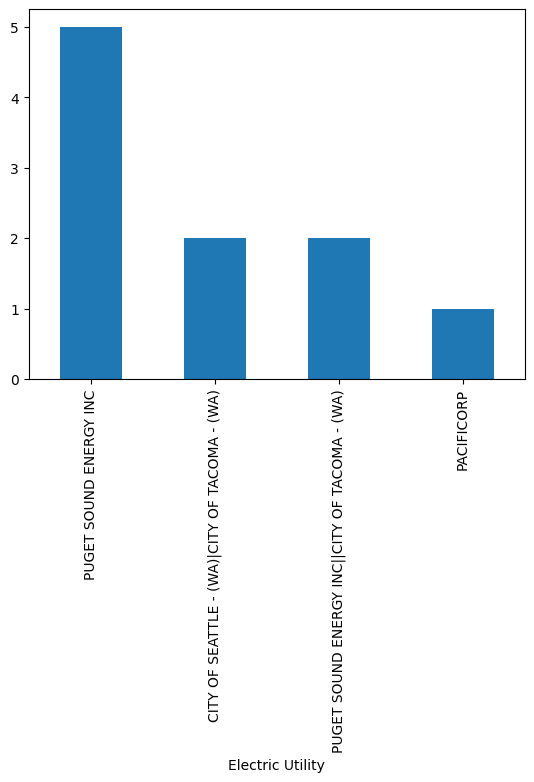

In [32]:
vehicle_clean['Electric Utility'].head(10).value_counts().plot(kind='bar')
plt.show()

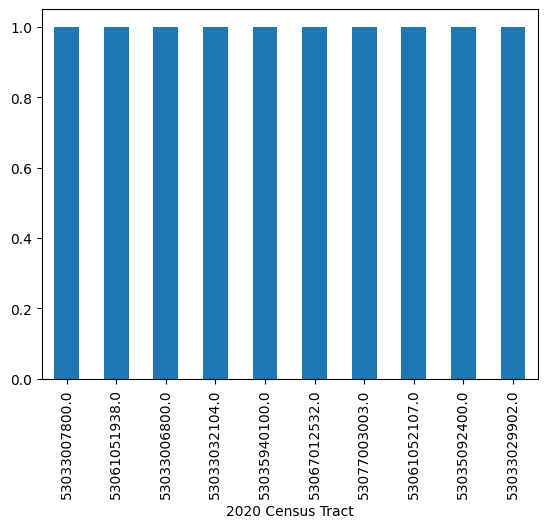

In [33]:
vehicle_clean['2020 Census Tract'].head(10).value_counts().plot(kind='bar')
plt.show()

Distribution of Electric Vehicle Types

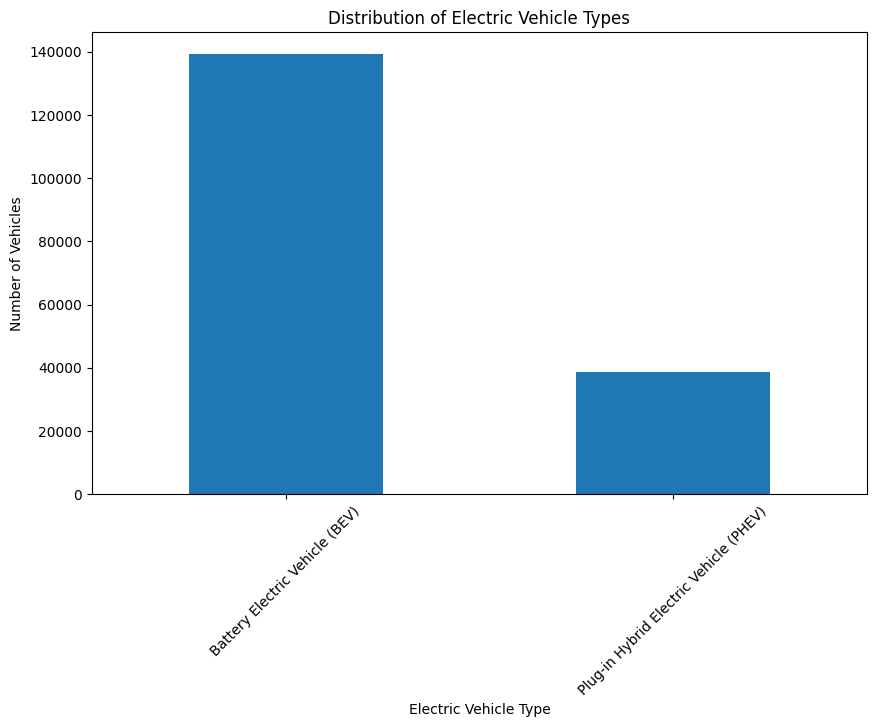

In [34]:
# Count the occurrences of each electric vehicle type
electric_vehicle_type_counts = vehicle['Electric Vehicle Type'].value_counts()

# Plot the distribution of electric vehicle types
plt.figure(figsize=(10, 6))
electric_vehicle_type_counts.plot(kind='bar')
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45)
plt.show()

The distribution of electric vehicle types using a pie chart

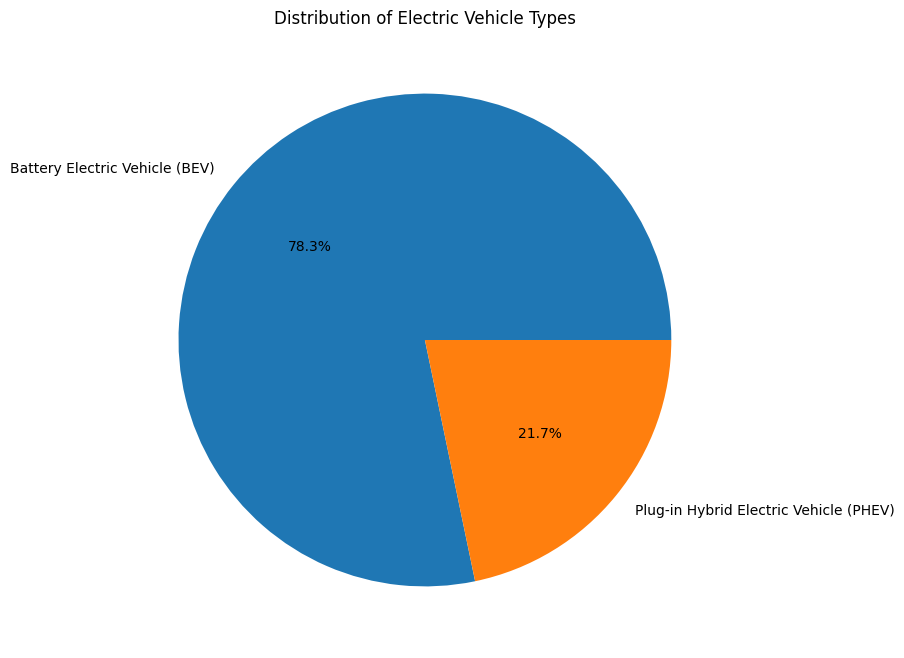

In [35]:
# Plot the distribution of electric vehicle types using a pie chart

plt.figure(figsize=(8, 8))  
electric_vehicle_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('')  # Remove the y-label as it's not needed for pie charts
plt.show()

Distribution of Electric Range by Electric Vehicle Type

<Figure size 1200x800 with 0 Axes>

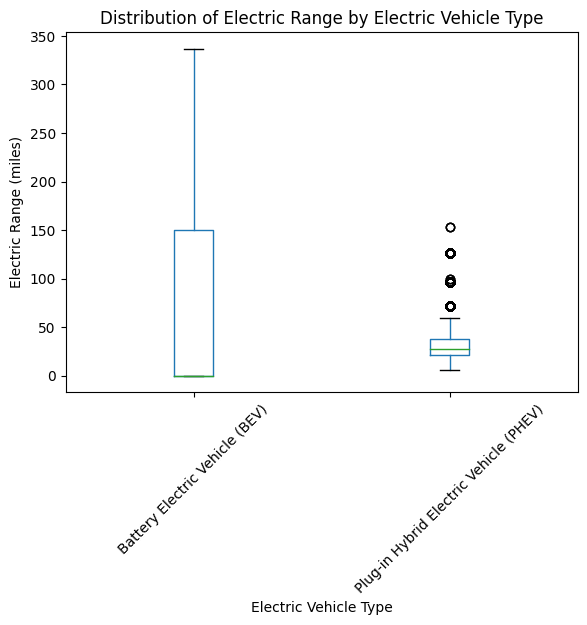

In [36]:
# Create a box plot to visualize the distribution of electric range across different electric vehicle types

plt.figure(figsize=(12, 8))
vehicle.boxplot(column='Electric Range', by='Electric Vehicle Type', grid=False)
plt.title('Distribution of Electric Range by Electric Vehicle Type')
plt.suptitle('') # Remove the default title
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.xticks(rotation=45)
plt.show()

Distribution of Vehicle Ages

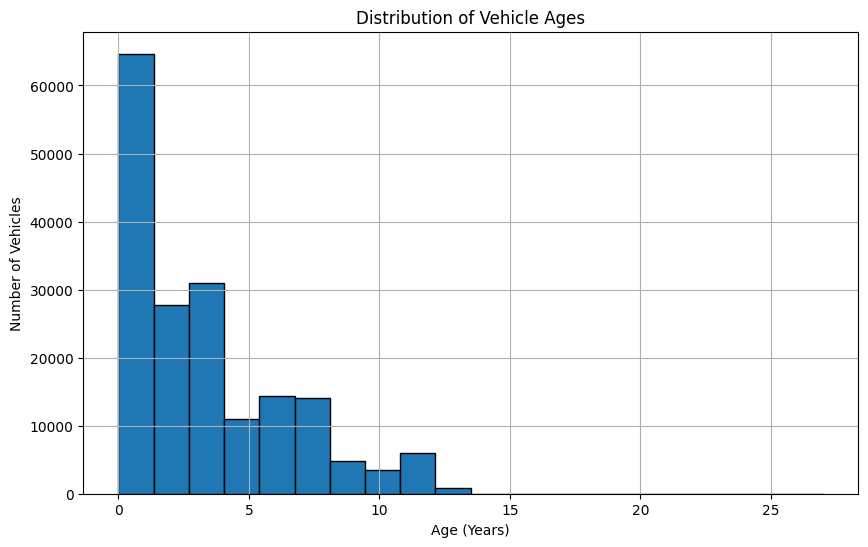

In [37]:
from datetime import datetime

# Calculate the current year
current_year = datetime.now().year

# Calculate vehicle ages
vehicle['Age'] = current_year - vehicle['Model Year']

# Plot the histogram for vehicle ages
plt.figure(figsize=(10, 6))
vehicle['Age'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Vehicle Ages')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Vehicles')
plt.show()

The correlation between vehicle age and electric range

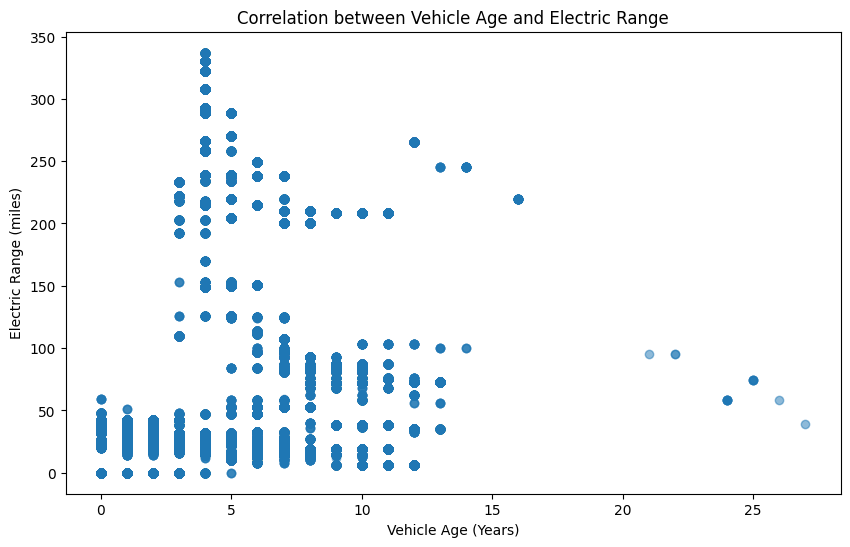

In [38]:
# Plot the scatter plot to explore the correlation between vehicle age and electric range

plt.figure(figsize=(10, 6))
plt.scatter(vehicle['Age'], vehicle['Electric Range'], alpha=0.5)
plt.title('Correlation between Vehicle Age and Electric Range')
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Electric Range (miles)')
plt.show()

In [39]:
import numpy as np
import scipy.stats as stats

# Calculate the Pearson correlation coefficient and p-value
pearson_corr, pearson_pvalue = stats.pearsonr(vehicle['Age'], vehicle['Electric Range'])

# Calculate the Spearman rank correlation coefficient and p-value
spearman_corr, spearman_pvalue = stats.spearmanr(vehicle['Age'], vehicle['Electric Range'])

pearson_corr, pearson_pvalue, spearman_corr, spearman_pvalue

(0.4768520604779334, 0.0, 0.6833592785125914, 0.0)

* The Pearson correlation coefficient between vehicle age and electric range is approximately 0.477, with a p-value of 0.0. This indicates a moderate positive correlation.

* The Spearman rank correlation coefficient is approximately 0.683, with a p-value of 0.0. This suggests a strong positive correlation when considering the rank order of the data.